## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('OnlineRetail.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.keys()  # viewing all coloumns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.shape  # finding no. of rows and columns

(541909, 8)

In [5]:
df.describe() # viewing basic details

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df=df.loc[df['Quantity'] > 0] # removing the redundancy
df.shape # viewing shape

(531285, 8)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [9]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])  # converting InvoiceDate into datetime

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [11]:
df['Sales']=df.Quantity * df.UnitPrice  # creating a column of sale

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
monetary = df.groupby('CustomerID').Sales.sum() # getting monetary value

In [14]:
monetary = monetary.reset_index()

In [15]:
monetary.head()

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Now calculating frequency of  dataset

In [16]:
frequency = df.groupby('CustomerID').InvoiceNo.count()  # calculating frequency

In [17]:
frequency=frequency.reset_index()

In [18]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


##  Now calculateing recency value

In [19]:
LastDate = max(df.InvoiceDate)  # calculating last date

In [20]:
LastDate

Timestamp('2011-12-09 12:50:00')

In [21]:
LastDate = LastDate + pd.DateOffset(days=1) # adding day to lastdate and invoicedate

In [22]:
LastDate

Timestamp('2011-12-10 12:50:00')

In [23]:
df['Diff']=LastDate-df.InvoiceDate # calculatin diff

In [24]:
recency = df.groupby('CustomerID').Diff.min()
recency = recency.reset_index()

In [25]:
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


##  Now create a combined data frame


In [26]:
rmf = monetary.merge(frequency, on = 'CustomerID')

In [27]:
rmf= rmf.merge(recency, on  = 'CustomerID')

In [66]:
rmf.columns = ['CustomerID','Monetary','Frequency','Recency']

In [67]:
rmf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [68]:
RMF1 = rmf.drop('CustomerID',axis=1) # dropping customerid on axis 1

In [69]:
RMF1.Recency = RMF1.Recency.dt.days

In [70]:
RMF1

,Monetary,Frequency,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


In [71]:
rmf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


## KMeans Algorithm

In [72]:
from sklearn.cluster import KMeans

In [73]:
RMF1 = RMF1.dropna()

In [74]:
ssd = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\

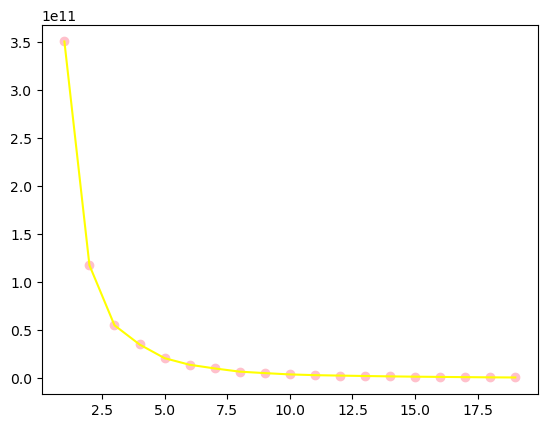

In [75]:

plt.plot(np.arange(1,20),ssd,color='yellow')
plt.scatter(np.arange(1,20),ssd,color='pink')
plt.show()

In [76]:
model = KMeans(n_clusters=5)
ClusterID= model.fit_predict(RMF1)

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
ClusterID

array([2, 0, 0, ..., 0, 0, 0])

In [78]:
RMF1['ClusterID']= ClusterID
RMF1

,Monetary,Frequency,Recency,ClusterID
0,77183.60,1,326,2
1,4310.00,182,2,0
2,1797.24,31,75,0
3,1757.55,73,19,0
4,334.40,17,310,0
...,...,...,...,...
4334,180.60,10,278,0
4335,80.82,7,181,0
4336,178.05,12,8,0
4337,2094.88,756,4,0


## Data Visualization

In [79]:
km_cluster_sale = RMF1.groupby('ClusterID').Monetary.mean()

In [80]:
km_recency_sale = RMF1.groupby('ClusterID').Recency.mean()

In [81]:
km_frequency_sale = RMF1.groupby('ClusterID').Frequency.mean()

In [82]:
km_cluster_sale

ClusterID
0      1049.274575
1    149828.502000
2     51858.727500
3    269931.660000
4     10022.790242
Name: Monetary, dtype: float64

In [83]:
import seaborn as sns

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='Frequency'>

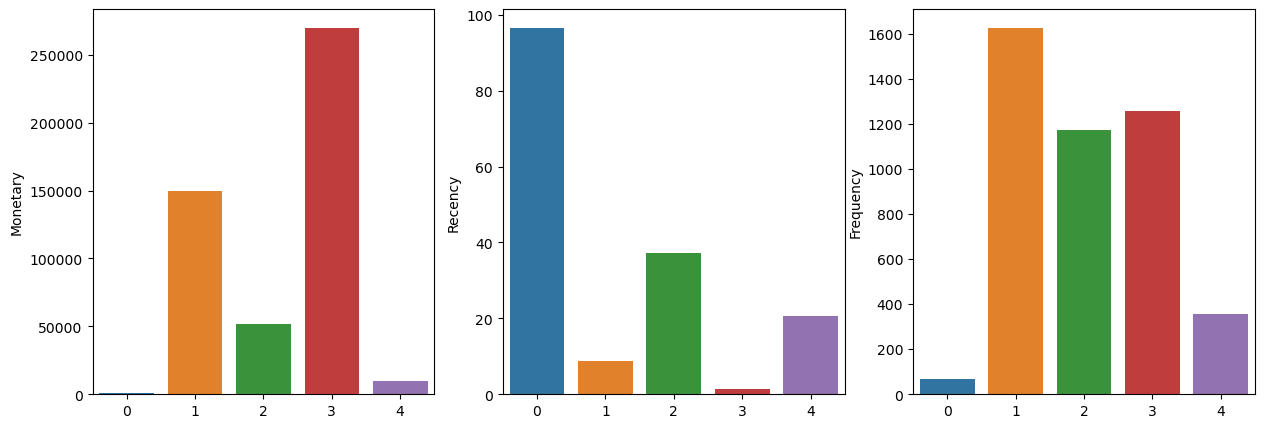

In [88]:
fig,axs=plt.subplots(1,3, figsize = (15,5))
sns.barplot(x=[0,1,2,3,4], y=km_cluster_sale, ax=axs[0])
sns.barplot(x=[0,1,2,3,4], y=km_recency_sale, ax=axs[1])
sns.barplot(x=[0,1,2,3,4], y=km_frequency_sale, ax=axs[2])

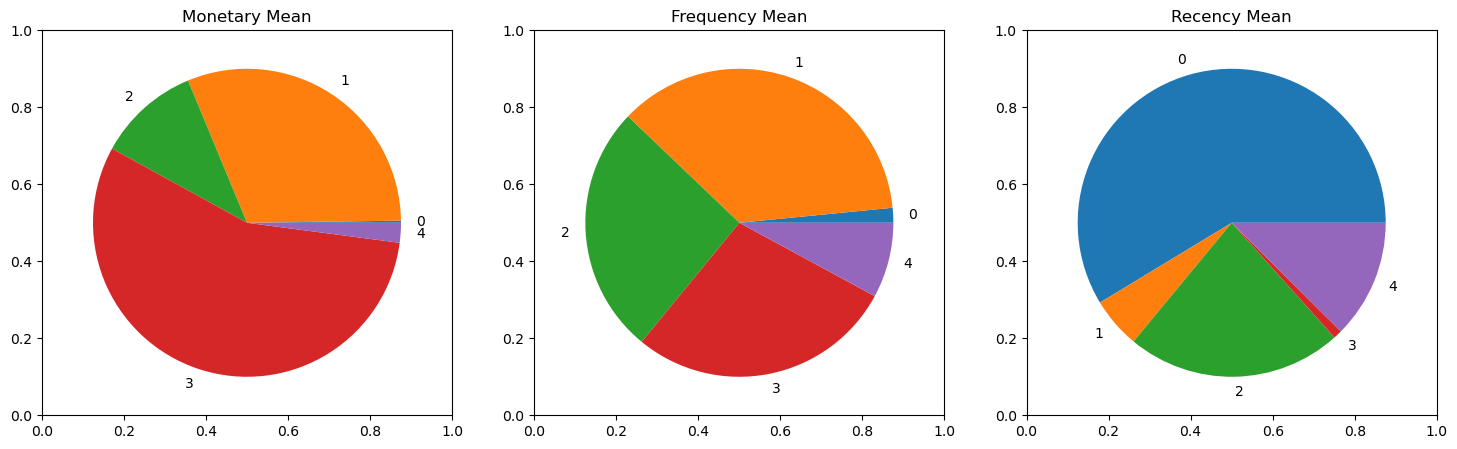

In [91]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1=fig.add_subplot(1,3,1)
plt.title('Monetary Mean')
ax1.pie(km_cluster_sale, labels=[0,1,2,3,4])
ax1=fig.add_subplot(1,3,2)
plt.title('Frequency Mean')
ax1.pie(km_frequency_sale, labels=[0,1,2,3,4])
ax1=fig.add_subplot(1,3,3)
plt.title('Recency Mean')
ax1.pie(km_recency_sale, labels=[0,1,2,3,4])
ax1.axis('off')
plt.show()
